In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [6]:

#i did some changes to original data to make it more efficient to use and not missing the firt rows of data

In [7]:
df=pd.read_csv('Sonaralldata.csv')
df


,1,2,3,4,5,6,7,8,9,10,...,52,53,54,55,56,57,58,59,60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [8]:
df.describe()

,1,2,3,4,5,6,7,8,9,10,...,51,52,53,54,55,56,57,58,59,60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
1,208.0,0.029164,0.022991,0.0015,0.013350,0.02280,0.035550,0.1371
2,208.0,0.038437,0.032960,0.0006,0.016450,0.03080,0.047950,0.2339
3,208.0,0.043832,0.038428,0.0015,0.018950,0.03430,0.057950,0.3059
4,208.0,0.053892,0.046528,0.0058,0.024375,0.04405,0.064500,0.4264
5,208.0,0.075202,0.055552,0.0067,0.038050,0.06250,0.100275,0.4010
6,208.0,0.104570,0.059105,0.0102,0.067025,0.09215,0.134125,0.3823
7,208.0,0.121747,0.061788,0.0033,0.080900,0.10695,0.154000,0.3729
8,208.0,0.134799,0.085152,0.0055,0.080425,0.11210,0.169600,0.4590
9,208.0,0.178003,0.118387,0.0075,0.097025,0.15225,0.233425,0.6828
10,208.0,0.208259,0.134416,0.0113,0.111275,0.18240,0.268700,0.7106


In [10]:
df.dtypes

1        float64
2        float64
3        float64
4        float64
5        float64
          ...   
57       float64
58       float64
59       float64
60       float64
Class     object
Length: 61, dtype: object

In [11]:
df.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37',
       '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49',
       '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       'Class'],
      dtype='object')

In [12]:
#so i got to know that we are supposed to find out the class
#i mean rock or mines
#so class is the target variable

In [13]:
df.groupby('Class').count()

,1,2,3,4,5,6,7,8,9,10,...,51,52,53,54,55,56,57,58,59,60
Class,,,,,,,,,,,,,,,,,,,,,
M,111,111,111,111,111,111,111,111,111,111,...,111,111,111,111,111,111,111,111,111,111
R,97,97,97,97,97,97,97,97,97,97,...,97,97,97,97,97,97,97,97,97,97


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       208 non-null    float64
 1   2       208 non-null    float64
 2   3       208 non-null    float64
 3   4       208 non-null    float64
 4   5       208 non-null    float64
 5   6       208 non-null    float64
 6   7       208 non-null    float64
 7   8       208 non-null    float64
 8   9       208 non-null    float64
 9   10      208 non-null    float64
 10  11      208 non-null    float64
 11  12      208 non-null    float64
 12  13      208 non-null    float64
 13  14      208 non-null    float64
 14  15      208 non-null    float64
 15  16      208 non-null    float64
 16  17      208 non-null    float64
 17  18      208 non-null    float64
 18  19      208 non-null    float64
 19  20      208 non-null    float64
 20  21      208 non-null    float64
 21  22      208 non-null    float64
 22  23

In [15]:
df.Class.unique()

array(['R', 'M'], dtype=object)

In [16]:
#R--->Rock
#M--->Mines
df.groupby('Class').size()

Class
M    111
R     97
dtype: int64

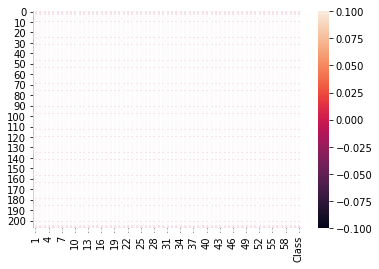

In [17]:
sns.heatmap(df.isnull(),annot=True)

In [18]:
#There's no missing data
#still
df.isnull().sum()

1        0
2        0
3        0
4        0
5        0
        ..
57       0
58       0
59       0
60       0
Class    0
Length: 61, dtype: int64

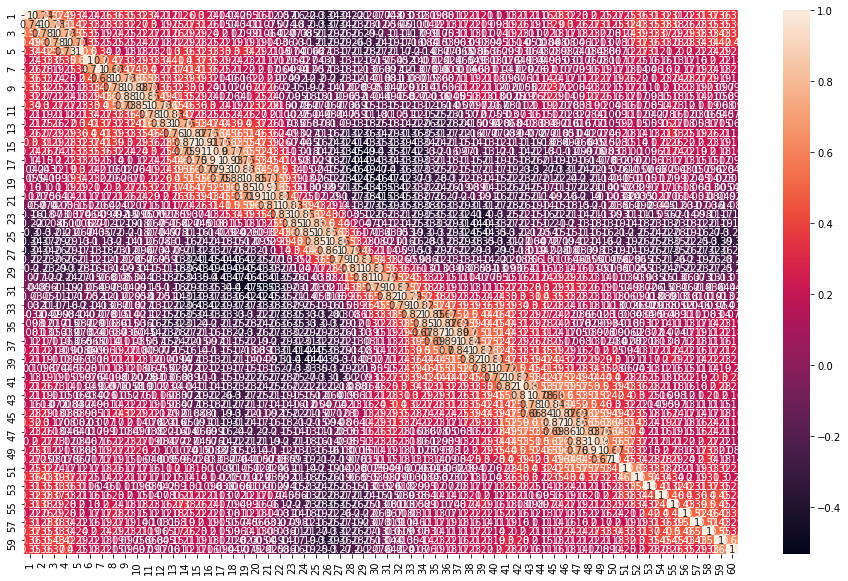

In [19]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True)

In [20]:
#i really regret doing that above
#btw it looks cool right
#then i leave correlation to u guys to find out then

In [21]:
#outliers for god shake

# Machine learning

In [22]:
x = df.drop(columns='Class').values
y = df['Class']
y = y.map({'R' : 0, 'M' : 1}).values

In [23]:
x

array([[0.02  , 0.0371, 0.0428, ..., 0.0084, 0.009 , 0.0032],
       [0.0453, 0.0523, 0.0843, ..., 0.0049, 0.0052, 0.0044],
       [0.0262, 0.0582, 0.1099, ..., 0.0164, 0.0095, 0.0078],
       ...,
       [0.0522, 0.0437, 0.018 , ..., 0.0138, 0.0077, 0.0031],
       [0.0303, 0.0353, 0.049 , ..., 0.0079, 0.0036, 0.0048],
       [0.026 , 0.0363, 0.0136, ..., 0.0036, 0.0061, 0.0115]])

In [24]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [25]:
#wow no need to label encoding
#x,y are ready for machine learning

In [26]:
#preprocessing the data
#we need to feature scale for using knn classifier or any other classifier using euclidian distance
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(x)
newx=scaler.transform(x)
print(newx)

[[-0.39955135 -0.04064823 -0.02692565 ...  0.06987027  0.17167808
  -0.65894689]
 [ 0.70353822  0.42163039  1.05561832 ... -0.47240644 -0.44455424
  -0.41985233]
 [-0.12922901  0.60106749  1.72340448 ...  1.30935987  0.25276128
   0.25758223]
 ...
 [ 1.00438083  0.16007801 -0.67384349 ...  0.90652575 -0.03913824
  -0.67887143]
 [ 0.04953255 -0.09539176  0.13480381 ... -0.00759783 -0.70402047
  -0.34015415]
 [-0.13794908 -0.06497869 -0.78861924 ... -0.6738235  -0.29860448
   0.99479044]]


In [27]:
x.shape

(208, 60)

In [28]:
y.shape

(208,)

In [29]:
newx.shape

(208, 60)

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(newx,y,test_size=0.30,random_state=42)

In [31]:
#from sklearn.preprocessing import Normalizer
#xnew=x #onlly for using multinomialNB
#transformer = Normalizer().fit(xnew)  # fit does nothing.
#transformer
#Normalizer()
#transformer.transform(xnew)


In [32]:
#mnb=MultinomialNB()
#mnb.fit(x_train,y_train)
#predmnb=mnb.predict(x_test)
#print(accuracy_score(y_test,predmnb))
#print(confusion_matrix(y_test,predmnb))
#print(classification_report(y_test,predmnb))


#Doubt-error = negative values are present

SVM Classifier

In [33]:
# SVM
from sklearn.svm import SVR

svr=SVR(kernel="linear")
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_y=svr.predict(x_test)


svr=SVR(kernel="poly")
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_y=svr.predict(x_test)


svr=SVR(kernel="rbf")
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_y=svr.predict(x_test)

kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.5647320038595381
0.8724853021614556
0.9489422813678728


Decision Tree Classifier

In [34]:
#DecisionTreeClassifier(criterion='gini')---------->default
#DecisionTreeClassifier(criterion='entropy')
#gini and entropy
dtc=DecisionTreeClassifier() #gini
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

#DecisionTreeClassifier(criterion='gini')---------->default
#DecisionTreeClassifier(criterion='entropy')
#gini and entropy
dtc=DecisionTreeClassifier(criterion='entropy') 
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7142857142857143
[[22  6]
 [12 23]]
              precision    recall  f1-score   support

           0       0.65      0.79      0.71        28
           1       0.79      0.66      0.72        35

    accuracy                           0.71        63
   macro avg       0.72      0.72      0.71        63
weighted avg       0.73      0.71      0.71        63

0.7936507936507936
[[22  6]
 [ 7 28]]
              precision    recall  f1-score   support

           0       0.76      0.79      0.77        28
           1       0.82      0.80      0.81        35

    accuracy                           0.79        63
   macro avg       0.79      0.79      0.79        63
weighted avg       0.79      0.79      0.79        63



In [35]:
#k=10
dtc=KNeighborsClassifier() #gini
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.873015873015873
[[23  5]
 [ 3 32]]
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        28
           1       0.86      0.91      0.89        35

    accuracy                           0.87        63
   macro avg       0.87      0.87      0.87        63
weighted avg       0.87      0.87      0.87        63



ALL in one

In [36]:
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')


model=[LogisticRegression(), GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is:
0.7619047619047619
[[21  7]
 [ 8 27]]
              precision    recall  f1-score   support

           0       0.72      0.75      0.74        28
           1       0.79      0.77      0.78        35

    accuracy                           0.76        63
   macro avg       0.76      0.76      0.76        63
weighted avg       0.76      0.76      0.76        63



Accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is:
0.7777777777777778
[[26  2]
 [12 23]]
              precision    recall  f1-score   support

           0       0.68      0.93      0.79        28
           1       0.92      0.66      0.77        35

    accuracy    

In [39]:
#Lets use SVM classifier
from sklearn.svm import SVC
svc=SVC()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svc, parameters, cv=5,scoring="f1")
clf.fit(newx,y)
clf.best_params_

{'C': 0.001, 'kernel': 'linear'}

In [48]:
svr=SVR(kernel="linear",C=0.001)
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_y=svr.predict(x_test)
sv.fit(x_train,y_train)
print(sv.score(x_train,y_train))

0.9489422813678728


In [56]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(svc,newx,y,cv=5,scoring="f1").mean())

0.6435899017212615


In [ ]:
#Lets save the above model
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(svc,'sonar.pkl')